NAME:KOPPURAVURI SATHVIK

Installs all the required Python libraries needed for text processing, machine learning, and data visualization

In [1]:
# Installing necessary libraries for the project
# These libraries will be used for data processing, visualization, and machine learning

!pip install wordcloud
!pip install scikit-learn
!pip install imbalanced-learn
!pip install xgboost
!pip install textblob

Imports all necessary libraries including pandas for data handling, sklearn for machine learning, and NLTK for text processing.

In [2]:
# Importing all necessary libraries for our text classification project

# For mounting Google Drive
from google.colab import drive

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Text processing libraries
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud

# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split

# Machine Learning - Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine Learning - Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Machine Learning - Classification Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Sampling utilities
from sklearn.utils import resample

# NLTK for natural language processing
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Import NLTK components
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# For timing operations
import time

print("All libraries imported successfully!")
print("Setup completed - ready to proceed!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


All libraries imported successfully!
Setup completed - ready to proceed!


Mounts Google Drive and loads the consumer complaints CSV file into a pandas dataframe for analysis.

In [3]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load the consumer complaints dataset from Google Drive
# Update the path based on where your file is located in Google Drive
file_path = '/content/drive/MyDrive/complaints.csv'

try:
    # Reading the CSV file
    df = pd.read_csv(file_path)

    print("Dataset loaded successfully!")
    print("="*70)
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of Rows: {df.shape[0]:,}")
    print(f"Number of Columns: {df.shape[1]}")
    print("="*70)

    # Display basic information about the dataset
    print("\nColumn Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")

    print("\n" + "="*70)
    print("First 5 rows of the dataset:")
    print("="*70)
    display(df.head())

    print("\n" + "="*70)
    print("Dataset Information:")
    print("="*70)
    df.info()

except FileNotFoundError:
    print("Error: File not found!")
    print("Please check the file path and try again.")
    print("Current path:", file_path)

Mounted at /content/drive
Dataset loaded successfully!
Dataset Shape: (11522175, 18)
Number of Rows: 11,522,175
Number of Columns: 18

Column Names:
1. Date received
2. Product
3. Sub-product
4. Issue
5. Sub-issue
6. Consumer complaint narrative
7. Company public response
8. Company
9. State
10. ZIP code
11. Tags
12. Consumer consent provided?
13. Submitted via
14. Date sent to company
15. Company response to consumer
16. Timely response?
17. Consumer disputed?
18. Complaint ID

First 5 rows of the dataset:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-10-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75287,NaN,NaN,Web,2025-10-15,In progress,Yes,NaN,16593757
4,2025-10-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NC,28379,NaN,NaN,Web,2025-10-16,In progress,Yes,NaN,16623506



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11522175 entries, 0 to 11522174
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), objec

Explores the product categories in the dataset and shows how many complaints exist for each type.

In [4]:
# Let's explore the product categories in our dataset
# This will help us understand the distribution of complaints

print("="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Check how many unique product types we have
print(f"\nTotal unique product categories: {df['Product'].nunique()}")

print("\n" + "="*70)
print("Distribution of Product Categories:")
print("="*70)

# Display count of each product type
product_counts = df['Product'].value_counts()
print(product_counts)

# Calculate percentage for each category
print("\n" + "="*70)
print("Percentage Distribution:")
print("="*70)
product_percentage = (df['Product'].value_counts() / len(df) * 100).round(2)
for product, percentage in product_percentage.items():
    print(f"{product}: {percentage}%")

EXPLORATORY DATA ANALYSIS

Total unique product categories: 21

Distribution of Product Categories:
Product
Credit reporting or other personal consumer reports                             6555928
Credit reporting, credit repair services, or other personal consumer reports    2163850
Debt collection                                                                  895870
Mortgage                                                                         430203
Checking or savings account                                                      315234
Credit card                                                                      258143
Credit card or prepaid card                                                      206368
Money transfer, virtual currency, or money service                               156115
Credit reporting                                                                 140429
Student loan                                                                     115045
Bank account

Checks for missing values in all columns and specifically analyzes how many complaints have text narratives.

In [5]:
# Checking for missing values in the dataset
# This is important to understand data quality

print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)

# Create a dataframe for better visualization
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Count',
    ascending=False
)

print("\nColumns with missing values:")
print(missing_df.to_string(index=False))

# Specifically check the complaint narrative column
print("\n" + "="*70)
print("COMPLAINT NARRATIVE ANALYSIS")
print("="*70)
total_complaints = len(df)
with_narrative = df['Consumer complaint narrative'].notna().sum()
without_narrative = df['Consumer complaint narrative'].isna().sum()
percentage_with = (with_narrative / total_complaints * 100).round(2)

print(f"Total complaints: {total_complaints:,}")
print(f"Complaints with narrative: {with_narrative:,} ({percentage_with}%)")
print(f"Complaints without narrative: {without_narrative:,} ({100-percentage_with}%)")

print("\nNote: We will only use complaints with narrative text for classification")

MISSING VALUES ANALYSIS

Columns with missing values:
                      Column  Missing_Count  Percentage
                        Tags       10850279       94.17
          Consumer disputed?       10753891       93.33
Consumer complaint narrative        8107664       70.37
     Company public response        5711355       49.57
  Consumer consent provided?        1936136       16.80
                   Sub-issue         861936        7.48
                 Sub-product         235295        2.04
                       State          56852        0.49
                    ZIP code          30229        0.26
Company response to consumer             20        0.00
                       Issue              6        0.00

COMPLAINT NARRATIVE ANALYSIS
Total complaints: 11,522,175
Complaints with narrative: 3,414,511 (29.63%)
Complaints without narrative: 8,107,664 (70.37%)

Note: We will only use complaints with narrative text for classification


Filters the dataset to keep only the 4 target categories and maps them to numerical labels (0, 1, 2, 3).

In [6]:
# Now we need to filter our dataset to include only the 4 categories we want to classify
# We'll map different product names to our 4 target categories

print("="*70)
print("FILTERING DATA FOR TARGET CATEGORIES")
print("="*70)

# Define mapping of product categories to our target labels
# Category 0: Credit reporting, repair, or other
# Category 1: Debt collection
# Category 2: Consumer Loan
# Category 3: Mortgage

category_mapping = {
    # Credit reporting related (Category 0)
    'Credit reporting, repair, or other': 0,
    'Credit reporting or other personal consumer reports': 0,
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Credit reporting': 0,

    # Debt collection (Category 1)
    'Debt collection': 1,
    'Debt or credit management': 1,

    # Consumer Loan (Category 2)
    'Consumer Loan': 2,
    'Student loan': 2,
    'Vehicle loan or lease': 2,
    'Payday loan, title loan, or personal loan': 2,
    'Payday loan, title loan, personal loan, or advance loan': 2,
    'Payday loan': 2,

    # Mortgage (Category 3)
    'Mortgage': 3
}

print("\nCategory Mapping:")
print("-"*70)
print("Category 0 - Credit reporting, repair, or other")
print("Category 1 - Debt collection")
print("Category 2 - Consumer Loan")
print("Category 3 - Mortgage")
print("-"*70)

# Filter the dataset to include only relevant products
df_filtered = df[df['Product'].isin(category_mapping.keys())].copy()

print(f"\nOriginal dataset size: {len(df):,} records")
print(f"Filtered dataset size: {len(df_filtered):,} records")
print(f"Percentage of data retained: {(len(df_filtered)/len(df)*100):.2f}%")

# Create the target column by mapping products to categories
df_filtered['target'] = df_filtered['Product'].map(category_mapping)

print("\n" + "="*70)
print("DISTRIBUTION AFTER MAPPING TO TARGET CATEGORIES")
print("="*70)

# Show distribution of target categories
target_distribution = df_filtered['target'].value_counts().sort_index()
print("\nCount per category:")
for category, count in target_distribution.items():
    percentage = (count / len(df_filtered)) * 100
    category_name = ['Credit reporting', 'Debt collection', 'Consumer Loan', 'Mortgage'][category]
    print(f"Category {category} ({category_name}): {count:,} ({percentage:.2f}%)")

# Keep only records with complaint narrative
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notna()].copy()

print("\n" + "="*70)
print(f"After removing records without complaint text: {len(df_filtered):,} records")
print("="*70)

print("\nFinal distribution with complaint narratives:")
target_distribution_final = df_filtered['target'].value_counts().sort_index()
for category, count in target_distribution_final.items():
    percentage = (count / len(df_filtered)) * 100
    category_name = ['Credit reporting', 'Debt collection', 'Consumer Loan', 'Mortgage'][category]
    print(f"Category {category} ({category_name}): {count:,} ({percentage:.2f}%)")

FILTERING DATA FOR TARGET CATEGORIES

Category Mapping:
----------------------------------------------------------------------
Category 0 - Credit reporting, repair, or other
Category 1 - Debt collection
Category 2 - Consumer Loan
Category 3 - Mortgage
----------------------------------------------------------------------

Original dataset size: 11,522,175 records
Filtered dataset size: 10,476,296 records
Percentage of data retained: 90.92%

DISTRIBUTION AFTER MAPPING TO TARGET CATEGORIES

Count per category:
Category 0 (Credit reporting): 8,860,207 (84.57%)
Category 1 (Debt collection): 902,180 (8.61%)
Category 2 (Consumer Loan): 283,706 (2.71%)
Category 3 (Mortgage): 430,203 (4.11%)

After removing records without complaint text: 2,928,013 records

Final distribution with complaint narratives:
Category 0 (Credit reporting): 2,277,879 (77.80%)
Category 1 (Debt collection): 375,312 (12.82%)
Category 2 (Consumer Loan): 139,985 (4.78%)
Category 3 (Mortgage): 134,837 (4.61%)


Creates a balanced dataset by randomly sampling 50,000 complaints from each category for efficient training.

In [7]:
# Since we have a very large dataset (11M+ records), we'll create a balanced sample
# This will make our training faster while maintaining good model performance
# We'll sample equal number of records from each category

print("="*70)
print("CREATING BALANCED SAMPLE DATASET")
print("="*70)

# Set random seed for reproducibility
np.random.seed(42)

# Define how many samples we want per category
# We'll use 50,000 samples per category = 200,000 total samples
samples_per_category = 50000

print(f"\nTarget samples per category: {samples_per_category:,}")
print("\nSampling from each category...")
print("-"*70)

# Create empty list to store sampled dataframes
sampled_dataframes = []

# Sample from each category
for category in sorted(df_filtered['target'].unique()):
    # Get all records for this category
    category_data = df_filtered[df_filtered['target'] == category]

    # Determine how many samples to take
    # If category has fewer records than needed, take all available
    n_samples = min(samples_per_category, len(category_data))

    # Randomly sample without replacement
    category_sample = resample(
        category_data,
        n_samples=n_samples,
        random_state=42,
        replace=False
    )

    # Add to list
    sampled_dataframes.append(category_sample)

    # Print sampling info
    category_name = ['Credit reporting', 'Debt collection', 'Consumer Loan', 'Mortgage'][category]
    print(f"Category {category} ({category_name}): Sampled {n_samples:,} from {len(category_data):,} available")

# Combine all sampled dataframes
df_sampled = pd.concat(sampled_dataframes, ignore_index=True)

# Shuffle the combined dataset
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n" + "="*70)
print("BALANCED SAMPLE CREATED")
print("="*70)
print(f"Total samples: {len(df_sampled):,}")

print("\nDistribution in sampled dataset:")
for category in sorted(df_sampled['target'].unique()):
    count = (df_sampled['target'] == category).sum()
    percentage = (count / len(df_sampled)) * 100
    category_name = ['Credit reporting', 'Debt collection', 'Consumer Loan', 'Mortgage'][category]
    print(f"Category {category} ({category_name}): {count:,} ({percentage:.1f}%)")

# Update our main dataframe with the sampled data
df = df_sampled.copy()

print(f"\n✓ Dataset is now balanced and ready for processing!")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

CREATING BALANCED SAMPLE DATASET

Target samples per category: 50,000

Sampling from each category...
----------------------------------------------------------------------
Category 0 (Credit reporting): Sampled 50,000 from 2,277,879 available
Category 1 (Debt collection): Sampled 50,000 from 375,312 available
Category 2 (Consumer Loan): Sampled 50,000 from 139,985 available
Category 3 (Mortgage): Sampled 50,000 from 134,837 available

BALANCED SAMPLE CREATED
Total samples: 200,000

Distribution in sampled dataset:
Category 0 (Credit reporting): 50,000 (25.0%)
Category 1 (Debt collection): 50,000 (25.0%)
Category 2 (Consumer Loan): 50,000 (25.0%)
Category 3 (Mortgage): 50,000 (25.0%)

✓ Dataset is now balanced and ready for processing!
Memory usage: 428.38 MB


Creates beautiful bar charts and pie charts to visualize the distribution of complaints across the 4 categories.

Creating visualizations...


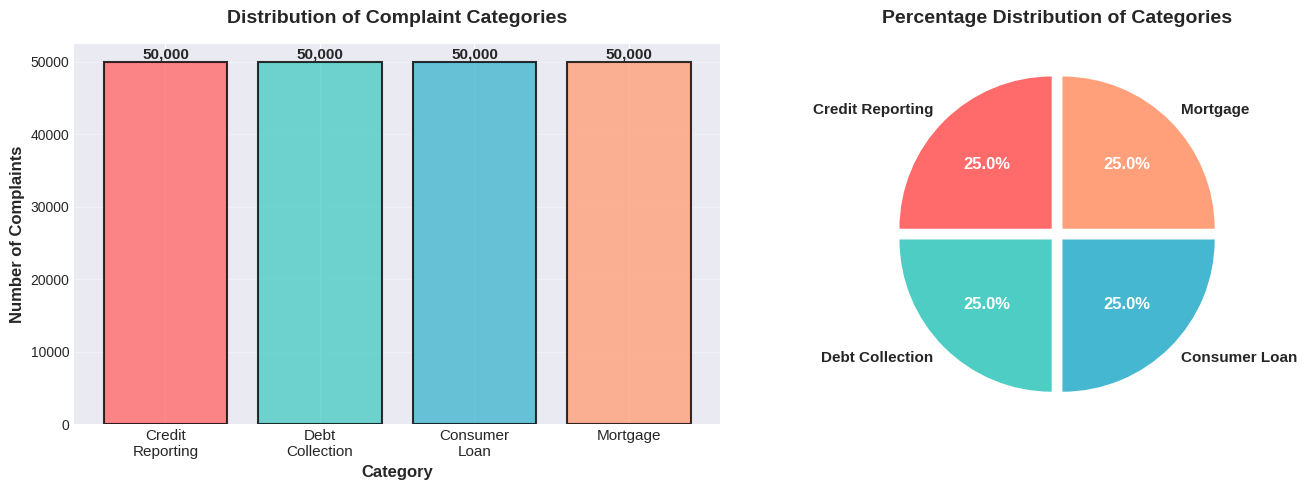


✓ Visualizations created successfully!


In [8]:
# Let's visualize the distribution of our sampled dataset
# This helps us understand our data before we start preprocessing

print("Creating visualizations...")

# Set the style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define category names and colors
category_names = ['Credit\nReporting', 'Debt\nCollection', 'Consumer\nLoan', 'Mortgage']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# 1. Bar chart showing count per category
ax1 = axes[0]
target_counts = df['target'].value_counts().sort_index()
bars = ax1.bar(range(len(target_counts)), target_counts.values,
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

ax1.set_xlabel('Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Complaints', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Complaint Categories', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(range(len(category_names)))
ax1.set_xticklabels(category_names, fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pie chart showing percentage distribution
ax2 = axes[1]
explode = (0.05, 0.05, 0.05, 0.05)  # Slightly separate all slices
wedges, texts, autotexts = ax2.pie(
    target_counts.values,
    labels=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

ax2.set_title('Percentage Distribution of Categories', fontsize=14, fontweight='bold', pad=15)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations created successfully!")

Analyzes the length of complaint texts in terms of characters and words for each category.

TEXT LENGTH ANALYSIS

Overall Text Statistics:
----------------------------------------------------------------------
Average text length: 1191 characters
Median text length: 792 characters
Shortest complaint: 10 characters
Longest complaint: 32959 characters

Average word count: 212 words

TEXT STATISTICS BY CATEGORY

Credit Reporting (Category 0):
----------------------------------------------------------------------
  Average length: 933 characters
  Median length: 612 characters
  Average words: 161 words
  Min length: 10 characters
  Max length: 32528 characters

Debt Collection (Category 1):
----------------------------------------------------------------------
  Average length: 928 characters
  Median length: 584 characters
  Average words: 164 words
  Min length: 11 characters
  Max length: 31778 characters

Consumer Loan (Category 2):
----------------------------------------------------------------------
  Average length: 1252 characters
  Median length: 884 characters
  Avera

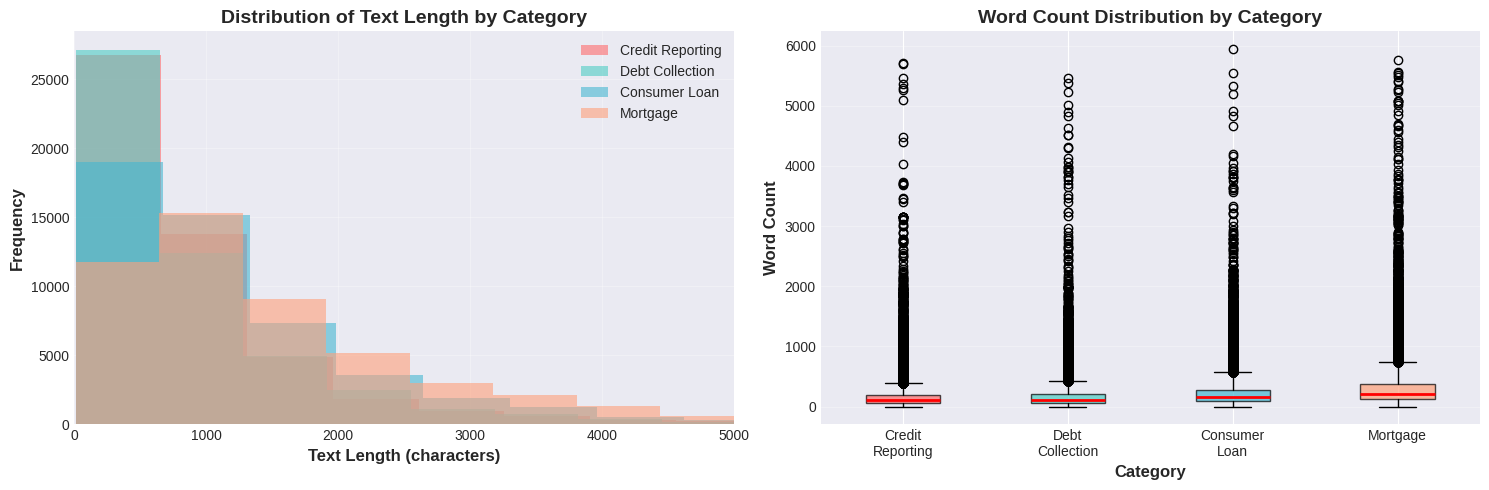


✓ Text length analysis completed!


In [9]:
# Before preprocessing, let's analyze the length of complaint texts
# This helps us understand the text characteristics across different categories

print("="*70)
print("TEXT LENGTH ANALYSIS")
print("="*70)

# Calculate text length for each complaint
df['text_length'] = df['Consumer complaint narrative'].astype(str).apply(len)
df['word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Overall statistics
print("\nOverall Text Statistics:")
print("-"*70)
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Median text length: {df['text_length'].median():.0f} characters")
print(f"Shortest complaint: {df['text_length'].min()} characters")
print(f"Longest complaint: {df['text_length'].max()} characters")
print(f"\nAverage word count: {df['word_count'].mean():.0f} words")

# Statistics by category
print("\n" + "="*70)
print("TEXT STATISTICS BY CATEGORY")
print("="*70)

category_names_dict = {
    0: 'Credit Reporting',
    1: 'Debt Collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

for category in sorted(df['target'].unique()):
    category_data = df[df['target'] == category]
    print(f"\n{category_names_dict[category]} (Category {category}):")
    print("-"*70)
    print(f"  Average length: {category_data['text_length'].mean():.0f} characters")
    print(f"  Median length: {category_data['text_length'].median():.0f} characters")
    print(f"  Average words: {category_data['word_count'].mean():.0f} words")
    print(f"  Min length: {category_data['text_length'].min()} characters")
    print(f"  Max length: {category_data['text_length'].max()} characters")

# Visualize text length distribution
print("\nCreating text length visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogram of text lengths by category
ax1 = axes[0]
for category in sorted(df['target'].unique()):
    category_data = df[df['target'] == category]['text_length']
    ax1.hist(category_data, bins=50, alpha=0.6,
            label=category_names_dict[category],
            color=colors[category])

ax1.set_xlabel('Text Length (characters)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Text Length by Category', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(0, 5000)
ax1.grid(alpha=0.3)

# 2. Box plot comparing word counts
ax2 = axes[1]
word_counts_by_category = [df[df['target'] == cat]['word_count'] for cat in sorted(df['target'].unique())]
box_plot = ax2.boxplot(word_counts_by_category,
                        labels=['Credit\nReporting', 'Debt\nCollection', 'Consumer\nLoan', 'Mortgage'],
                        patch_artist=True,
                        medianprops=dict(color='red', linewidth=2))

# Color the boxes
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Word Count', fontsize=12, fontweight='bold')
ax2.set_xlabel('Category', fontsize=12, fontweight='bold')
ax2.set_title('Word Count Distribution by Category', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Text length analysis completed!")

Displays 2 real example complaints from each category to understand what each type looks like.

In [10]:
# Let's look at actual examples from each category
# This helps us understand what kind of complaints fall into each category

print("="*70)
print("SAMPLE COMPLAINTS FROM EACH CATEGORY")
print("="*70)

category_names = {
    0: 'Credit Reporting/Repair',
    1: 'Debt Collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

# Display 2 examples from each category
for category in sorted(df['target'].unique()):
    print(f"\n{'='*70}")
    print(f"CATEGORY {category}: {category_names[category]}")
    print('='*70)

    # Get samples from this category
    category_samples = df[df['target'] == category].sample(n=2, random_state=42)

    for idx, (i, row) in enumerate(category_samples.iterrows(), 1):
        print(f"\nExample {idx}:")
        print("-"*70)
        complaint_text = row['Consumer complaint narrative']
        # Show first 400 characters
        if len(complaint_text) > 400:
            print(complaint_text[:400] + "...")
        else:
            print(complaint_text)
        print()

print("="*70)
print("✓ Sample complaints displayed successfully!")
print("="*70)

SAMPLE COMPLAINTS FROM EACH CATEGORY

CATEGORY 0: Credit Reporting/Repair

Example 1:
----------------------------------------------------------------------
I am listing accounts below that have been reported inaccurately on my credit report. In compliance with the Fair Credit Reporting Act and as a gesture of respect to the Federal Trade Commission Committee on accuracy and completeness of credit information I am formally writing in today to dispute negative information appearing on my credit. This incorrect information is greatly hindering me from g...


Example 2:
----------------------------------------------------------------------
HELLO, I AM NOT DOING WELL. I AM VERY STRESSED OUT. I recently did an investigation on my credit report and I am verifying that these NEGATIVE accounts are not mines. 
Under the United States Code Law 15 U.S Code 1681 a ( 4 ) Consumer Right to privacy. You are reporting fraudulent accounts that are not mine, which is infringement of my privacy. Congress

Creates a text cleaning function that removes URLs, emails, numbers, stopwords, and applies lemmatization.

In [11]:
# Text preprocessing is crucial for improving model performance
# We'll create a comprehensive function to clean and normalize text

print("="*70)
print("TEXT PREPROCESSING SETUP")
print("="*70)

# Initialize the tools we'll use for preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add custom stopwords that don't add value for classification
custom_stopwords = {'xxxx', 'xx', 'xxx', 'xxxxxxxx', 'xxxxxxxxxxxxxxxx'}
stop_words.update(custom_stopwords)

print(f"\nTotal stopwords loaded: {len(stop_words)}")

def clean_text(text):
    """
    Comprehensive text cleaning function

    Steps:
    1. Convert to lowercase
    2. Remove URLs, emails, dates, and numbers
    3. Remove special characters
    4. Remove stopwords
    5. Lemmatize words
    6. Return cleaned text
    """

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove dates in various formats
    text = re.sub(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', '', text)
    text = re.sub(r'\d{4}[/-]\d{1,2}[/-]\d{1,2}', '', text)

    # Remove currency amounts
    text = re.sub(r'\$\d+\.?\d*', '', text)

    # Remove account numbers (long sequences of digits)
    text = re.sub(r'\b\d{4,}\b', '', text)

    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and short words, then lemmatize
    cleaned_words = []
    for word in words:
        if word not in stop_words and len(word) > 2:
            # Lemmatize to get root form of word
            lemmatized_word = lemmatizer.lemmatize(word)
            cleaned_words.append(lemmatized_word)

    # Join words back into text
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# Test the function with a sample complaint
print("\nTesting preprocessing function...")
print("-"*70)

sample_complaint = df['Consumer complaint narrative'].iloc[0]
print("\nOriginal complaint (first 250 characters):")
print(sample_complaint[:250])

# Download 'punkt_tab' if not already present
try:
    word_tokenize("test") # Attempt a tokenization to trigger the check
except LookupError:
    print("Downloading 'punkt_tab' NLTK resource...")
    nltk.download('punkt_tab')


cleaned_sample = clean_text(sample_complaint)
print("\nCleaned complaint (first 250 characters):")
print(cleaned_sample[:250])

print("\n" + "="*70)
print("✓ Preprocessing function is ready!")
print("="*70)

TEXT PREPROCESSING SETUP

Total stopwords loaded: 203

Testing preprocessing function...
----------------------------------------------------------------------

Original complaint (first 250 characters):
On XX/XX/XXXX, Ive received correspondence from Wells Fargo XXXX XXXX XXXX XXXX, expressing Account Origination and status. 

I am continuing to seeking resolution in this matter, by way of Good faith. please see attachments. 

XXXX XXXX XXXX XXXX


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Cleaned complaint (first 250 characters):
ive received correspondence well fargo expressing account origination status continuing seeking resolution matter way good faith please see attachment

✓ Preprocessing function is ready!


Applies the text cleaning function to all 200,000 complaints and shows before/after examples.

In [12]:
# Now we'll apply our preprocessing function to all 200,000 complaints
# This will take a few minutes

print("="*70)
print("APPLYING PREPROCESSING TO ALL COMPLAINTS")
print("="*70)

print("\nProcessing 200,000 complaint narratives...")
print("This may take 4-5 minutes. Please wait...")
print("-"*70)

# Track the time taken
start_time = time.time()

# Apply preprocessing to all complaints
df['cleaned_text'] = df['Consumer complaint narrative'].apply(clean_text)

# Calculate time taken
time_taken = time.time() - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print(f"\n✓ Preprocessing completed in {minutes} minutes and {seconds} seconds")

# Check for any empty texts after preprocessing
empty_count = (df['cleaned_text'].str.len() == 0).sum()
print(f"\nEmpty texts after cleaning: {empty_count}")

# Remove empty texts if any
if empty_count > 0:
    print(f"Removing {empty_count} empty records...")
    df = df[df['cleaned_text'].str.len() > 0].reset_index(drop=True)
    print(f"✓ Final dataset size: {len(df):,} records")

# Show some examples of before and after
print("\n" + "="*70)
print("SAMPLE CLEANED TEXTS")
print("="*70)

# Show 3 random examples
np.random.seed(42)
sample_indices = np.random.choice(df.index, size=3, replace=False)

for i, idx in enumerate(sample_indices, 1):
    print(f"\nExample {i} - Category {df.loc[idx, 'target']}:")
    print("-"*70)

    original = df.loc[idx, 'Consumer complaint narrative']
    cleaned = df.loc[idx, 'cleaned_text']

    print(f"Original: {original[:200]}...")
    print(f"\nCleaned:  {cleaned[:200]}...")
    print()

print("="*70)
print("✓ All complaints have been preprocessed!")
print("="*70)

APPLYING PREPROCESSING TO ALL COMPLAINTS

Processing 200,000 complaint narratives...
This may take 4-5 minutes. Please wait...
----------------------------------------------------------------------

✓ Preprocessing completed in 5 minutes and 4 seconds

Empty texts after cleaning: 22
Removing 22 empty records...
✓ Final dataset size: 199,978 records

SAMPLE CLEANED TEXTS

Example 1 - Category 1:
----------------------------------------------------------------------
Original: The original creditor is " XXXX XXXX XXXX '' and I have contacted them via telephone and was told that they had billed a different source responsible for my services than the usual one and that they w...

Cleaned:  original creditor contacted via telephone told billed different source responsible service usual one would correct billing one usually billed told would notify transworld system inc cease desist immed...


Example 2 - Category 0:
----------------------------------------------------------------------
Origi

 Creates 7 new numerical features from the text including word count, sentiment scores, and punctuation analysis.

In [13]:
# In addition to the cleaned text, we'll create some numerical features
# These can help improve model performance

print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

print("\nCreating additional features from text...")
print("-"*70)

# 1. Word count in cleaned text
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
print("✓ Word count calculated")

# 2. Character count in cleaned text
df['char_count'] = df['cleaned_text'].apply(len)
print("✓ Character count calculated")

# 3. Average word length
df['avg_word_length'] = df['cleaned_text'].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
)
print("✓ Average word length calculated")

# 4. Sentiment analysis - polarity (positive/negative sentiment)
print("\nCalculating sentiment scores (this may take a moment)...")
df['sentiment_polarity'] = df['Consumer complaint narrative'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)
print("✓ Sentiment polarity calculated")

# 5. Sentiment subjectivity (objective vs subjective)
df['sentiment_subjectivity'] = df['Consumer complaint narrative'].apply(
    lambda x: TextBlob(str(x)).sentiment.subjectivity
)
print("✓ Sentiment subjectivity calculated")

# 6. Uppercase ratio (might indicate urgency or emotion)
df['uppercase_ratio'] = df['Consumer complaint narrative'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0
)
print("✓ Uppercase ratio calculated")

# 7. Exclamation count (might indicate strong emotion)
df['exclamation_count'] = df['Consumer complaint narrative'].apply(
    lambda x: str(x).count('!')
)
print("✓ Exclamation count calculated")

print("\n" + "="*70)
print("FEATURE SUMMARY")
print("="*70)

features_created = [
    'word_count', 'char_count', 'avg_word_length',
    'sentiment_polarity', 'sentiment_subjectivity',
    'uppercase_ratio', 'exclamation_count'
]

print("\nNew features created:")
for i, feature in enumerate(features_created, 1):
    print(f"{i}. {feature}")

# Show feature statistics
print("\n" + "="*70)
print("OVERALL FEATURE STATISTICS")
print("="*70)
print(df[features_created].describe().round(2))

print("\n✓ Feature engineering completed!")
print("="*70)

FEATURE ENGINEERING

Creating additional features from text...
----------------------------------------------------------------------
✓ Word count calculated
✓ Character count calculated
✓ Average word length calculated

Calculating sentiment scores (this may take a moment)...
✓ Sentiment polarity calculated
✓ Sentiment subjectivity calculated
✓ Uppercase ratio calculated
✓ Exclamation count calculated

FEATURE SUMMARY

New features created:
1. word_count
2. char_count
3. avg_word_length
4. sentiment_polarity
5. sentiment_subjectivity
6. uppercase_ratio
7. exclamation_count

OVERALL FEATURE STATISTICS
       word_count  char_count  avg_word_length  sentiment_polarity  \
count   199978.00   199978.00        199978.00           199978.00   
mean        93.13      692.02             6.42                0.02   
std        113.10      861.17             0.72                0.15   
min          1.00        3.00             3.00               -1.00   
25%         31.00      227.00            

Calculates and displays the average values of all features for each of the 4 complaint categories.

In [14]:
# Let's see how these features differ across categories
# This helps us understand what distinguishes each category

print("="*70)
print("FEATURE ANALYSIS BY CATEGORY")
print("="*70)

category_names = {
    0: 'Credit Reporting',
    1: 'Debt Collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

features_to_analyze = [
    'word_count', 'char_count', 'avg_word_length',
    'sentiment_polarity', 'sentiment_subjectivity',
    'uppercase_ratio', 'exclamation_count'
]

# Display statistics for each category
for category in sorted(df['target'].unique()):
    print(f"\n{'='*70}")
    print(f"{category_names[category]} (Category {category})")
    print('='*70)

    category_data = df[df['target'] == category][features_to_analyze]

    print("\nMean values:")
    print("-"*70)
    for feature in features_to_analyze:
        mean_val = category_data[feature].mean()
        print(f"{feature:25s}: {mean_val:.3f}")

print("\n" + "="*70)
print("✓ Feature analysis completed!")
print("="*70)

FEATURE ANALYSIS BY CATEGORY

Credit Reporting (Category 0)

Mean values:
----------------------------------------------------------------------
word_count               : 70.085
char_count               : 550.267
avg_word_length          : 6.782
sentiment_polarity       : 0.018
sentiment_subjectivity   : 0.411
uppercase_ratio          : 0.119
exclamation_count        : 0.174

Debt Collection (Category 1)

Mean values:
----------------------------------------------------------------------
word_count               : 73.088
char_count               : 549.909
avg_word_length          : 6.470
sentiment_polarity       : 0.029
sentiment_subjectivity   : 0.357
uppercase_ratio          : 0.080
exclamation_count        : 0.169

Consumer Loan (Category 2)

Mean values:
----------------------------------------------------------------------
word_count               : 99.453
char_count               : 720.974
avg_word_length          : 6.179
sentiment_polarity       : 0.012
sentiment_subjectivity  

Creates multiple plots showing how features like word count and sentiment differ across categories.

Creating feature distribution visualizations...
This will generate multiple plots...


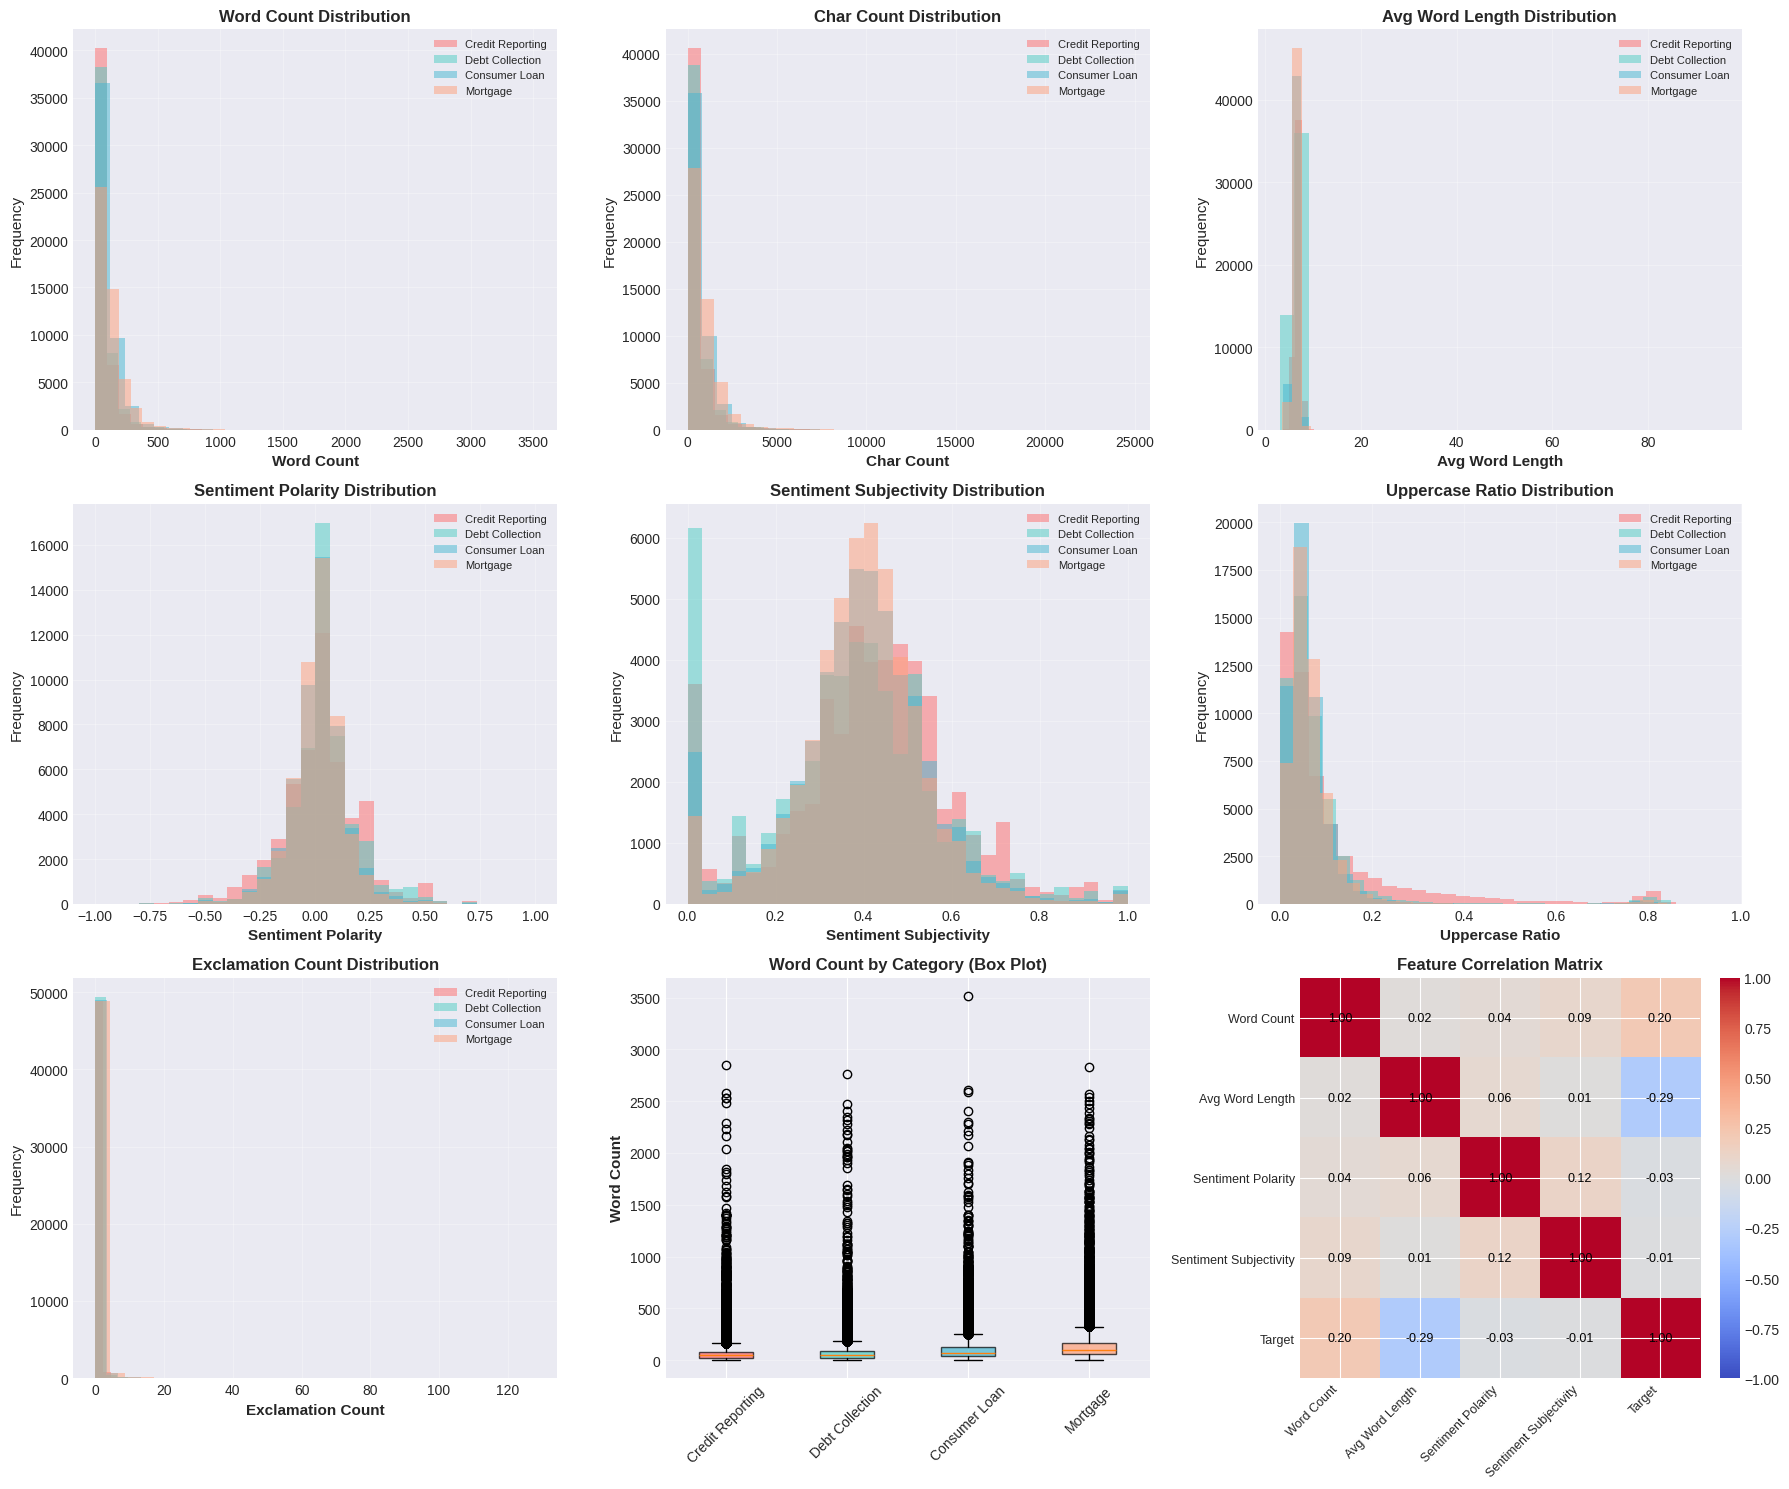


✓ Feature visualizations created successfully!


In [15]:
# Create visualizations to understand feature distributions across categories

print("Creating feature distribution visualizations...")
print("This will generate multiple plots...")

# Create a large figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

features_to_plot = [
    'word_count', 'char_count', 'avg_word_length',
    'sentiment_polarity', 'sentiment_subjectivity',
    'uppercase_ratio', 'exclamation_count'
]

category_names = ['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Plot distributions for each feature
for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]

    # Plot histogram for each category
    for category, name, color in zip(range(4), category_names, colors):
        data = df[df['target'] == category][feature]
        ax.hist(data, bins=30, alpha=0.5, label=name, color=color)

    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

# Box plot for word count comparison
ax = axes[7]
word_count_data = [df[df['target'] == i]['word_count'] for i in range(4)]
bp = ax.boxplot(word_count_data, labels=category_names, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Word Count', fontsize=11, fontweight='bold')
ax.set_title('Word Count by Category (Box Plot)', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(alpha=0.3, axis='y')

# Correlation heatmap
ax = axes[8]
correlation_features = ['word_count', 'avg_word_length', 'sentiment_polarity',
                       'sentiment_subjectivity', 'target']
corr_matrix = df[correlation_features].corr()

im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(range(len(correlation_features)))
ax.set_yticks(range(len(correlation_features)))
ax.set_xticklabels([f.replace('_', ' ').title() for f in correlation_features],
                    rotation=45, ha='right', fontsize=9)
ax.set_yticklabels([f.replace('_', ' ').title() for f in correlation_features], fontsize=9)

# Add correlation values
for i in range(len(correlation_features)):
    for j in range(len(correlation_features)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=9)

ax.set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("\n✓ Feature visualizations created successfully!")
print("="*70)

 Generates colorful word clouds for each category showing the most frequently used words in complaints.

GENERATING WORD CLOUDS

Creating word clouds for each category...
This will take a moment...


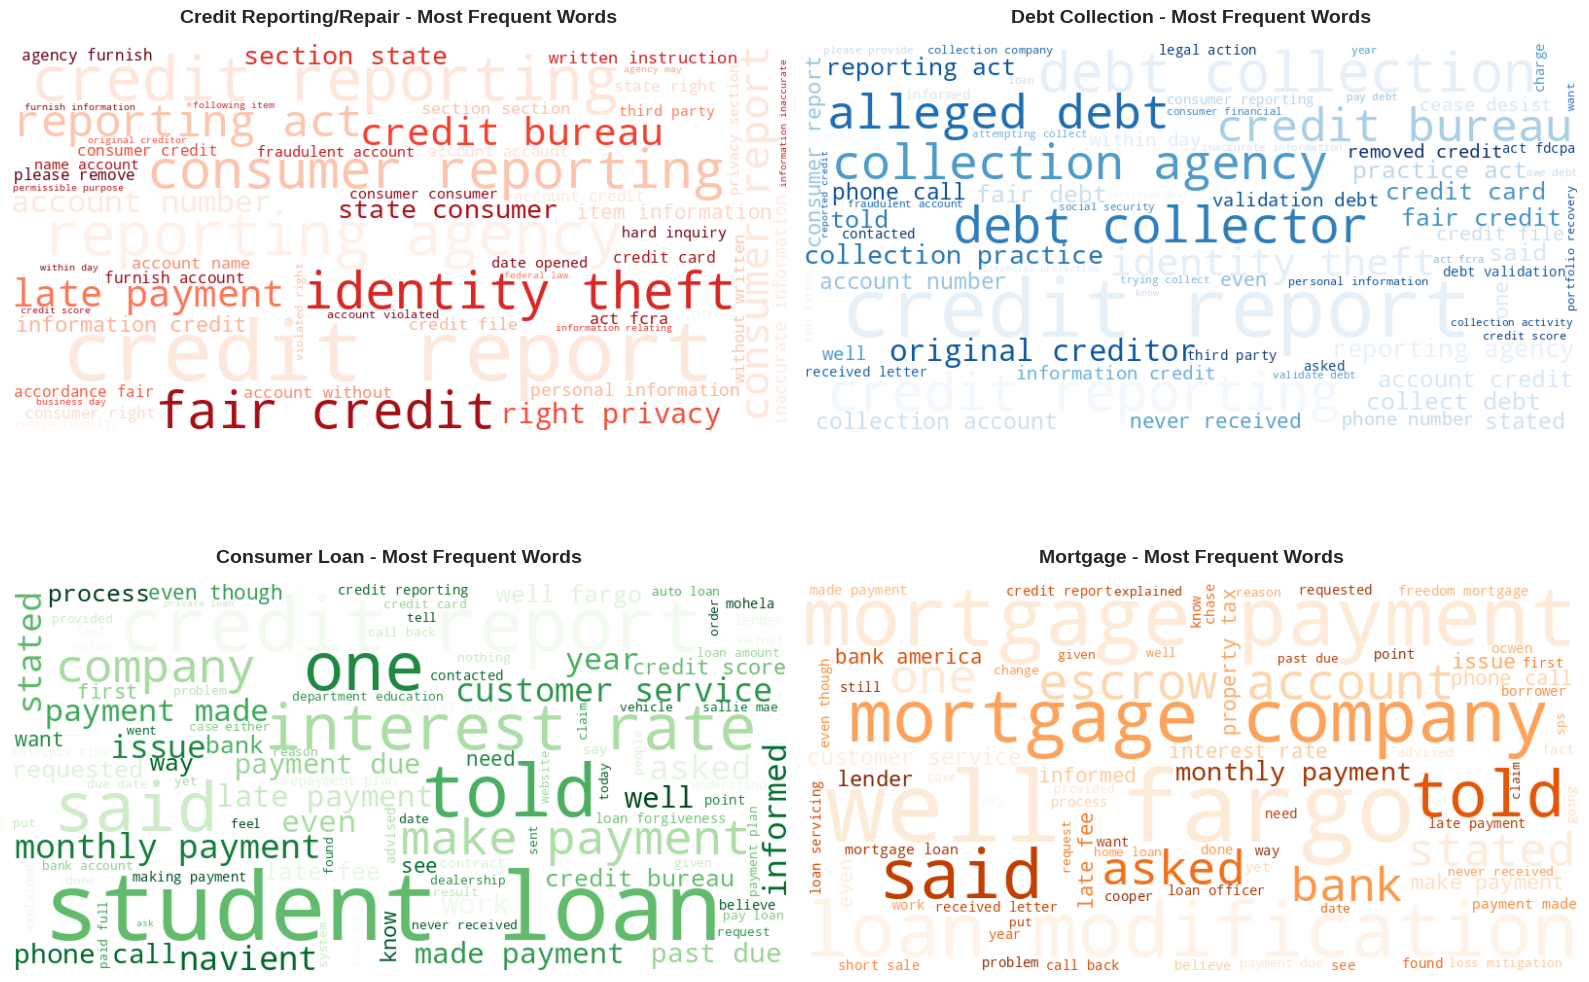


✓ Word clouds generated successfully!

Key observations:
- Each category has distinctive vocabulary
- Word clouds reveal the main topics in each complaint type


In [16]:
# Word clouds help us visualize the most common words in each category
# This gives us insight into what makes each category unique

print("="*70)
print("GENERATING WORD CLOUDS")
print("="*70)

print("\nCreating word clouds for each category...")
print("This will take a moment...")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Define category information
category_info = {
    0: {'name': 'Credit Reporting/Repair', 'color': 'Reds'},
    1: {'name': 'Debt Collection', 'color': 'Blues'},
    2: {'name': 'Consumer Loan', 'color': 'Greens'},
    3: {'name': 'Mortgage', 'color': 'Oranges'}
}

# Generate word cloud for each category
for category in sorted(df['target'].unique()):
    ax = axes[category]

    # Combine all cleaned text for this category
    text_combined = ' '.join(df[df['target'] == category]['cleaned_text'])

    # Create word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=category_info[category]['color'],
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10,
        random_state=42
    ).generate(text_combined)

    # Display word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(
        f"{category_info[category]['name']} - Most Frequent Words",
        fontsize=14,
        fontweight='bold',
        pad=15
    )

plt.tight_layout()
plt.show()

print("\n✓ Word clouds generated successfully!")
print("="*70)
print("\nKey observations:")
print("- Each category has distinctive vocabulary")
print("- Word clouds reveal the main topics in each complaint type")
print("="*70)

Splits the dataset into 80% for training the models and 20% for testing their accuracy.

In [17]:
# Before training our models, we need to split our data
# We'll use 80% for training and 20% for testing

print("="*70)
print("PREPARING DATA FOR MODEL TRAINING")
print("="*70)

# Prepare our features (X) and target (y)
X_text = df['cleaned_text']  # Our main feature: the cleaned complaint text
y = df['target']             # Our target: the category (0, 1, 2, or 3)

# Split the data into training and testing sets
# stratify=y ensures each set has the same proportion of each category
X_train, X_test, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain class balance
)

print("\nData split completed!")
print("-"*70)
print(f"Total samples: {len(df):,}")
print(f"\nTraining set: {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing set:  {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

# Verify the distribution in training and testing sets
print("\n" + "="*70)
print("CLASS DISTRIBUTION IN TRAINING SET")
print("="*70)
train_dist = y_train.value_counts().sort_index()
for category, count in train_dist.items():
    category_name = ['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'][category]
    percentage = (count / len(y_train)) * 100
    print(f"Category {category} ({category_name}): {count:,} ({percentage:.1f}%)")

print("\n" + "="*70)
print("CLASS DISTRIBUTION IN TESTING SET")
print("="*70)
test_dist = y_test.value_counts().sort_index()
for category, count in test_dist.items():
    category_name = ['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'][category]
    percentage = (count / len(y_test)) * 100
    print(f"Category {category} ({category_name}): {count:,} ({percentage:.1f}%)")

print("\n✓ Data is ready for model training!")
print("="*70)

PREPARING DATA FOR MODEL TRAINING

Data split completed!
----------------------------------------------------------------------
Total samples: 199,978

Training set: 159,982 samples (80.0%)
Testing set:  39,996 samples (20.0%)

CLASS DISTRIBUTION IN TRAINING SET
Category 0 (Credit Reporting): 39,985 (25.0%)
Category 1 (Debt Collection): 39,999 (25.0%)
Category 2 (Consumer Loan): 39,998 (25.0%)
Category 3 (Mortgage): 40,000 (25.0%)

CLASS DISTRIBUTION IN TESTING SET
Category 0 (Credit Reporting): 9,996 (25.0%)
Category 1 (Debt Collection): 10,000 (25.0%)
Category 2 (Consumer Loan): 10,000 (25.0%)
Category 3 (Mortgage): 10,000 (25.0%)

✓ Data is ready for model training!


Converts cleaned text into numerical TF-IDF features that machine learning models can understand.

In [18]:
# We need to convert text into numerical features that machine learning models can understand
# TF-IDF (Term Frequency-Inverse Document Frequency) is a popular method for this

print("="*70)
print("TEXT VECTORIZATION USING TF-IDF")
print("="*70)

print("\nConverting text to TF-IDF features...")
print("This process will:")
print("  1. Identify the most important words across all documents")
print("  2. Convert each complaint into a numerical vector")
print("  3. Give more weight to distinctive words")
print("-"*70)

# Initialize TF-IDF Vectorizer with optimized parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Use top 5000 most important words
    min_df=5,               # Word must appear in at least 5 documents
    max_df=0.8,             # Ignore words appearing in more than 80% of documents
    ngram_range=(1, 2),     # Use both single words and two-word phrases
    sublinear_tf=True       # Use logarithmic term frequency scaling
)

# Fit the vectorizer on training data and transform it
print("\nFitting vectorizer on training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
print("Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\n✓ Vectorization completed!")
print("="*70)

# Display information about the vectorization
print("\nVectorization Summary:")
print("-"*70)
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"  - {X_train_tfidf.shape[0]:,} samples")
print(f"  - {X_train_tfidf.shape[1]:,} features")
print(f"\nTesting set shape:  {X_test_tfidf.shape}")
print(f"  - {X_test_tfidf.shape[0]:,} samples")
print(f"  - {X_test_tfidf.shape[1]:,} features")

print(f"\nVocabulary size: {len(tfidf_vectorizer.vocabulary_):,} unique words/phrases")

# Show some example features
print("\nSample features (first 20 words/phrases):")
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, feature in enumerate(feature_names[:20], 1):
    print(f"{i:2}. {feature}")

print("\n" + "="*70)
print("✓ Text data has been converted to numerical features!")
print("  Ready for machine learning models!")
print("="*70)

TEXT VECTORIZATION USING TF-IDF

Converting text to TF-IDF features...
This process will:
  1. Identify the most important words across all documents
  2. Convert each complaint into a numerical vector
  3. Give more weight to distinctive words
----------------------------------------------------------------------

Fitting vectorizer on training data...
Transforming test data...

✓ Vectorization completed!

Vectorization Summary:
----------------------------------------------------------------------
Training set shape: (159982, 5000)
  - 159,982 samples
  - 5,000 features

Testing set shape:  (39996, 5000)
  - 39,996 samples
  - 5,000 features

Vocabulary size: 5,000 unique words/phrases

Sample features (first 20 words/phrases):
 1. ability
 2. ability obtain
 3. able
 4. able get
 5. able make
 6. able pay
 7. able provide
 8. absence
 9. absolutely
10. abuse
11. abusive
12. accept
13. accept payment
14. acceptable
15. acceptance
16. accepted
17. accepting
18. access
19. access accou

Trains 5 different machine learning models (Naive Bayes, Logistic Regression, SVM, Random Forest, XGBoost) on the data.

In [19]:
# Now we'll train 5 different classification models
# This allows us to compare and choose the best one

print("="*70)
print("TRAINING MULTIPLE CLASSIFICATION MODELS")
print("="*70)

print("\nWe will train the following models:")
print("  1. Multinomial Naive Bayes")
print("  2. Logistic Regression")
print("  3. Linear Support Vector Machine (SVM)")
print("  4. Random Forest")
print("  5. XGBoost")

print("\n" + "="*70)
print("This will take several minutes. Please be patient...")
print("="*70)

# Dictionary to store our models and their training times
models_dict = {}
training_times = {}

# 1. MULTINOMIAL NAIVE BAYES
print("\n[1/5] Training Multinomial Naive Bayes...")
start_time = time.time()

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf, y_train)

training_times['Naive Bayes'] = time.time() - start_time
models_dict['Naive Bayes'] = nb_model
print(f"      ✓ Completed in {training_times['Naive Bayes']:.2f} seconds")

# 2. LOGISTIC REGRESSION
print("\n[2/5] Training Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial'
)
lr_model.fit(X_train_tfidf, y_train)

training_times['Logistic Regression'] = time.time() - start_time
models_dict['Logistic Regression'] = lr_model
print(f"      ✓ Completed in {training_times['Logistic Regression']:.2f} seconds")

# 3. LINEAR SVM
print("\n[3/5] Training Linear SVM...")
start_time = time.time()

svm_model = LinearSVC(
    random_state=42,
    max_iter=1000,
    C=1.0
)
svm_model.fit(X_train_tfidf, y_train)

training_times['Linear SVM'] = time.time() - start_time
models_dict['Linear SVM'] = svm_model
print(f"      ✓ Completed in {training_times['Linear SVM']:.2f} seconds")

# 4. RANDOM FOREST
print("\n[4/5] Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
rf_model.fit(X_train_tfidf, y_train)

training_times['Random Forest'] = time.time() - start_time
models_dict['Random Forest'] = rf_model
print(f"      ✓ Completed in {training_times['Random Forest']:.2f} seconds")

# 5. XGBOOST
print("\n[5/5] Training XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train_tfidf, y_train)

training_times['XGBoost'] = time.time() - start_time
models_dict['XGBoost'] = xgb_model
print(f"      ✓ Completed in {training_times['XGBoost']:.2f} seconds")

# Summary of training times
print("\n" + "="*70)
print("✓ ALL MODELS TRAINED SUCCESSFULLY!")
print("="*70)

print("\nTraining Time Summary:")
print("-"*70)
for model_name, time_taken in training_times.items():
    minutes = int(time_taken // 60)
    seconds = int(time_taken % 60)
    print(f"{model_name:25s}: {time_taken:7.2f} seconds ({minutes}m {seconds}s)")

total_time = sum(training_times.values())
total_minutes = int(total_time // 60)
total_seconds = int(total_time % 60)
print("-"*70)
print(f"{'Total training time':25s}: {total_time:7.2f} seconds ({total_minutes}m {total_seconds}s)")

print("\n" + "="*70)

TRAINING MULTIPLE CLASSIFICATION MODELS

We will train the following models:
  1. Multinomial Naive Bayes
  2. Logistic Regression
  3. Linear Support Vector Machine (SVM)
  4. Random Forest
  5. XGBoost

This will take several minutes. Please be patient...

[1/5] Training Multinomial Naive Bayes...
      ✓ Completed in 0.09 seconds

[2/5] Training Logistic Regression...
      ✓ Completed in 39.48 seconds

[3/5] Training Linear SVM...
      ✓ Completed in 77.37 seconds

[4/5] Training Random Forest...
      ✓ Completed in 162.45 seconds

[5/5] Training XGBoost...
      ✓ Completed in 853.75 seconds

✓ ALL MODELS TRAINED SUCCESSFULLY!

Training Time Summary:
----------------------------------------------------------------------
Naive Bayes              :    0.09 seconds (0m 0s)
Logistic Regression      :   39.48 seconds (0m 39s)
Linear SVM               :   77.37 seconds (1m 17s)
Random Forest            :  162.45 seconds (2m 42s)
XGBoost                  :  853.75 seconds (14m 13s)
---

Evaluates all 5 models on test data, compares their accuracy, and identifies Logistic Regression as the best.

In [20]:
# Now let's evaluate how well each model performs
# We'll calculate multiple metrics to get a complete picture

print("="*70)
print("MODEL EVALUATION AND COMPARISON")
print("="*70)

print("\nEvaluating each model on the test set...")
print("-"*70)

# Dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models_dict.items():
    print(f"\nEvaluating {model_name}...")

    # Make predictions on test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'training_time': training_times[model_name]
    }

    # Display metrics
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Create a comparison dataframe
print("\n" + "="*70)
print("PERFORMANCE COMPARISON TABLE")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Training Time (s)': [results[m]['training_time'] for m in results.keys()]
})

# Sort by accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n", comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print("\n" + "="*70)
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("="*70)

# Store best model for later use
best_model = models_dict[best_model_name]

print("\n✓ Model evaluation completed!")
print("="*70)

MODEL EVALUATION AND COMPARISON

Evaluating each model on the test set...
----------------------------------------------------------------------

Evaluating Naive Bayes...
  Accuracy:  0.8364
  Precision: 0.8351
  Recall:    0.8364
  F1-Score:  0.8347

Evaluating Logistic Regression...
  Accuracy:  0.8863
  Precision: 0.8864
  Recall:    0.8863
  F1-Score:  0.8862

Evaluating Linear SVM...
  Accuracy:  0.8862
  Precision: 0.8862
  Recall:    0.8862
  F1-Score:  0.8862

Evaluating Random Forest...
  Accuracy:  0.8483
  Precision: 0.8491
  Recall:    0.8483
  F1-Score:  0.8483

Evaluating XGBoost...
  Accuracy:  0.8637
  Precision: 0.8646
  Recall:    0.8637
  F1-Score:  0.8639

PERFORMANCE COMPARISON TABLE

               Model  Accuracy  Precision   Recall  F1-Score  Training Time (s)
Logistic Regression  0.886264   0.886365 0.886264  0.886246          39.483300
         Linear SVM  0.886239   0.886221 0.886239  0.886155          77.372607
            XGBoost  0.863686   0.864581 0.863

Creates visualizations comparing accuracy, training time, and performance metrics across all 5 models.

CREATING PERFORMANCE VISUALIZATIONS


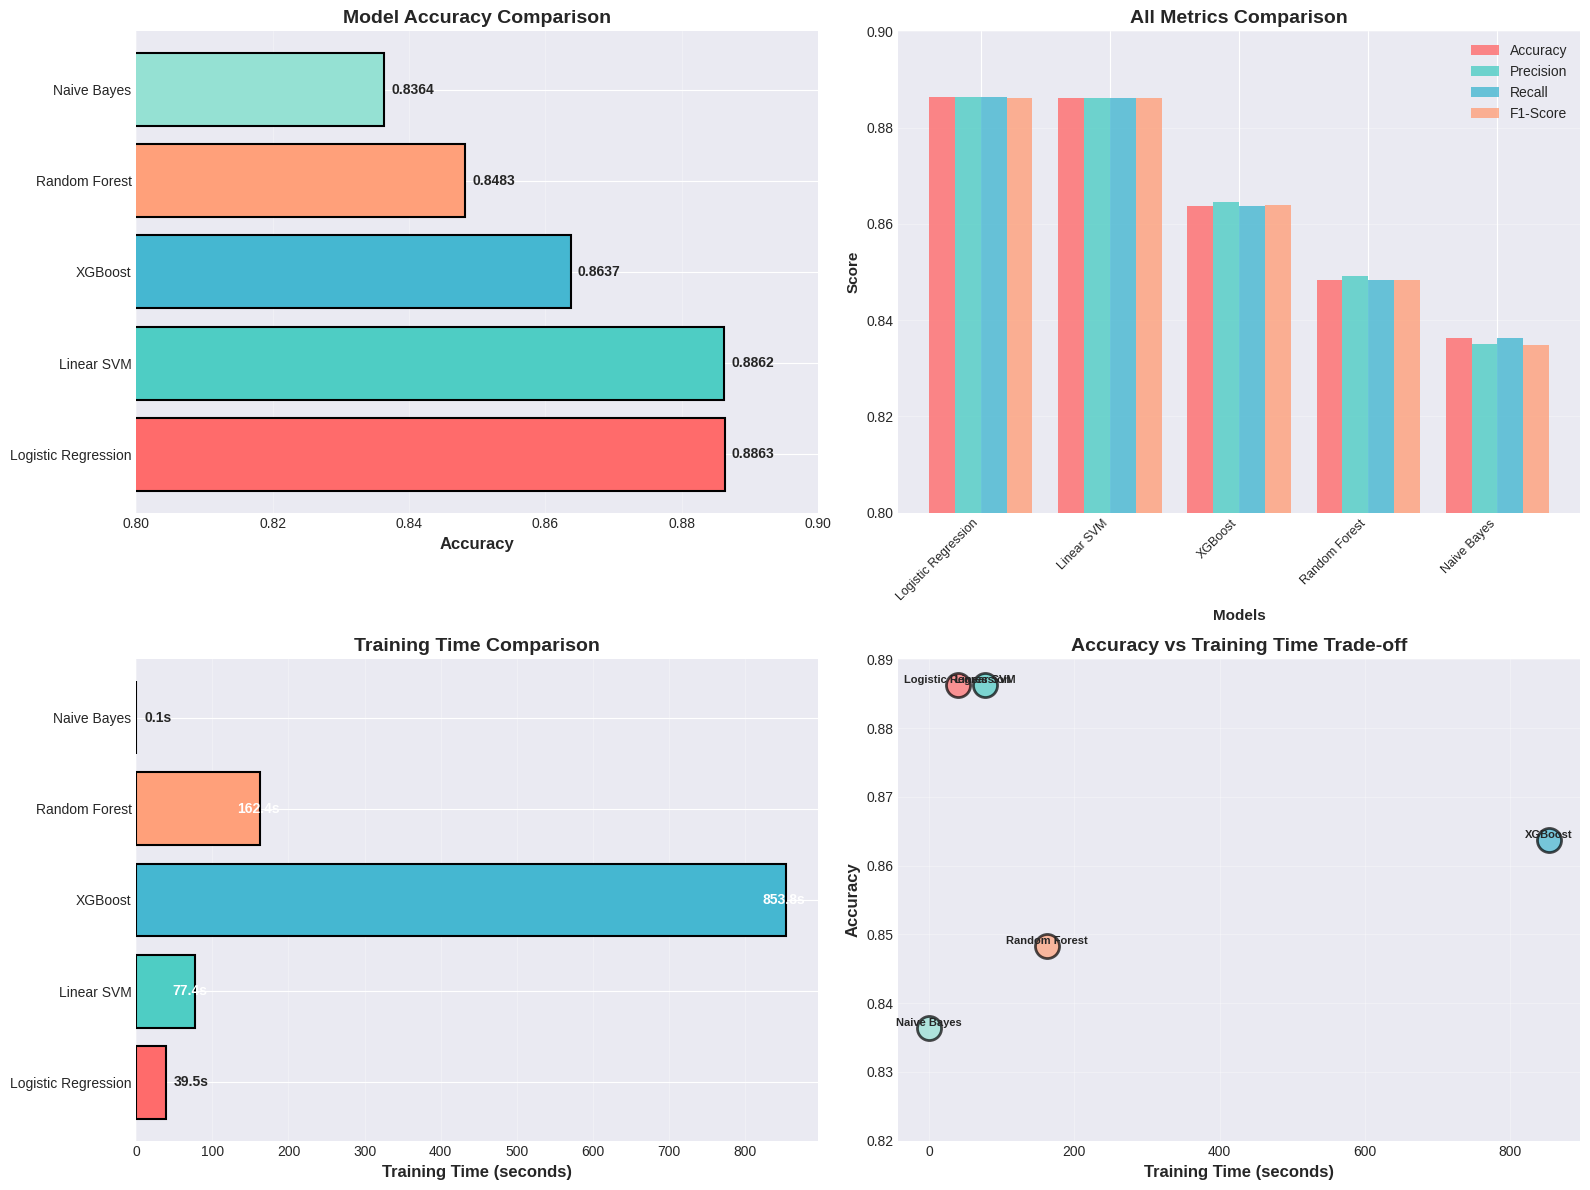


✓ Performance visualizations created!


In [21]:
# Let's create comprehensive visualizations to compare all models

print("="*70)
print("CREATING PERFORMANCE VISUALIZATIONS")
print("="*70)

# Create a large figure with multiple comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data for plotting
models = comparison_df['Model'].tolist()
accuracies = comparison_df['Accuracy'].tolist()
precisions = comparison_df['Precision'].tolist()
recalls = comparison_df['Recall'].tolist()
f1_scores = comparison_df['F1-Score'].tolist()
train_times = comparison_df['Training Time (s)'].tolist()

colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#95E1D3']

# 1. Accuracy Comparison (Horizontal Bar Chart)
ax1 = axes[0, 0]
bars = ax1.barh(models, accuracies, color=colors_bar, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0.8, 0.9)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax1.text(acc + 0.001, i, f'{acc:.4f}', va='center', fontweight='bold', fontsize=10)

# 2. All Metrics Comparison (Grouped Bar Chart)
ax2 = axes[0, 1]
x = np.arange(len(models))
width = 0.2

ax2.bar(x - width*1.5, accuracies, width, label='Accuracy', color='#FF6B6B', alpha=0.8)
ax2.bar(x - width*0.5, precisions, width, label='Precision', color='#4ECDC4', alpha=0.8)
ax2.bar(x + width*0.5, recalls, width, label='Recall', color='#45B7D1', alpha=0.8)
ax2.bar(x + width*1.5, f1_scores, width, label='F1-Score', color='#FFA07A', alpha=0.8)

ax2.set_xlabel('Models', fontsize=11, fontweight='bold')
ax2.set_ylabel('Score', fontsize=11, fontweight='bold')
ax2.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax2.legend(fontsize=10)
ax2.set_ylim(0.8, 0.9)
ax2.grid(axis='y', alpha=0.3)

# 3. Training Time Comparison
ax3 = axes[1, 0]
bars = ax3.barh(models, train_times, color=colors_bar, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax3.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, time_val) in enumerate(zip(bars, train_times)):
    if time_val > 50:
        ax3.text(time_val - 30, i, f'{time_val:.1f}s', va='center',
                fontweight='bold', fontsize=10, color='white')
    else:
        ax3.text(time_val + 10, i, f'{time_val:.1f}s', va='center',
                fontweight='bold', fontsize=10)

# 4. Accuracy vs Training Time (Scatter Plot)
ax4 = axes[1, 1]
for i, model in enumerate(models):
    ax4.scatter(train_times[i], accuracies[i], s=300, color=colors_bar[i],
               edgecolor='black', linewidth=2, alpha=0.7, label=model)
    ax4.annotate(model, (train_times[i], accuracies[i]),
                fontsize=8, ha='center', va='bottom', fontweight='bold')

ax4.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax4.set_title('Accuracy vs Training Time Trade-off', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0.82, 0.89)

plt.tight_layout()
plt.show()

print("\n✓ Performance visualizations created!")
print("="*70)

Shows detailed performance metrics (precision, recall, F1-score) for the best model on each category.

In [22]:
# Let's do a detailed evaluation of our best model (Logistic Regression)

print("="*70)
print("DETAILED EVALUATION: LOGISTIC REGRESSION")
print("="*70)

# Get predictions from the best model
y_pred_best = best_model.predict(X_test_tfidf)

# Classification report with detailed metrics for each class
category_names = [
    'Credit Reporting (0)',
    'Debt Collection (1)',
    'Consumer Loan (2)',
    'Mortgage (3)'
]

print("\nCLASSIFICATION REPORT:")
print("-"*70)
print(classification_report(y_test, y_pred_best, target_names=category_names, digits=4))

# Calculate per-class accuracy
print("\n" + "="*70)
print("PER-CLASS ACCURACY")
print("="*70)

for i, name in enumerate(category_names):
    # Get samples for this class
    class_mask = (y_test == i)
    class_predictions = y_pred_best[class_mask]
    class_true = y_test[class_mask]

    # Calculate accuracy for this class
    class_accuracy = accuracy_score(class_true, class_predictions)
    total_samples = class_mask.sum()
    correct_predictions = (class_predictions == class_true).sum()

    print(f"\n{name}")
    print(f"  Total samples: {total_samples}")
    print(f"  Correct predictions: {correct_predictions}")
    print(f"  Accuracy: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

print("\n" + "="*70)
print("✓ Detailed evaluation completed!")
print("="*70)

DETAILED EVALUATION: LOGISTIC REGRESSION

CLASSIFICATION REPORT:
----------------------------------------------------------------------
                      precision    recall  f1-score   support

Credit Reporting (0)     0.8575    0.8797    0.8684      9996
 Debt Collection (1)     0.8478    0.8282    0.8379     10000
   Consumer Loan (2)     0.8807    0.8847    0.8827     10000
        Mortgage (3)     0.9594    0.9525    0.9559     10000

            accuracy                         0.8863     39996
           macro avg     0.8864    0.8863    0.8862     39996
        weighted avg     0.8864    0.8863    0.8862     39996


PER-CLASS ACCURACY

Credit Reporting (0)
  Total samples: 9996
  Correct predictions: 8793
  Accuracy: 0.8797 (87.97%)

Debt Collection (1)
  Total samples: 10000
  Correct predictions: 8282
  Accuracy: 0.8282 (82.82%)

Consumer Loan (2)
  Total samples: 10000
  Correct predictions: 8847
  Accuracy: 0.8847 (88.47%)

Mortgage (3)
  Total samples: 10000
  Correct 

Generates confusion matrices for all models showing which categories get confused with each other.

GENERATING CONFUSION MATRICES


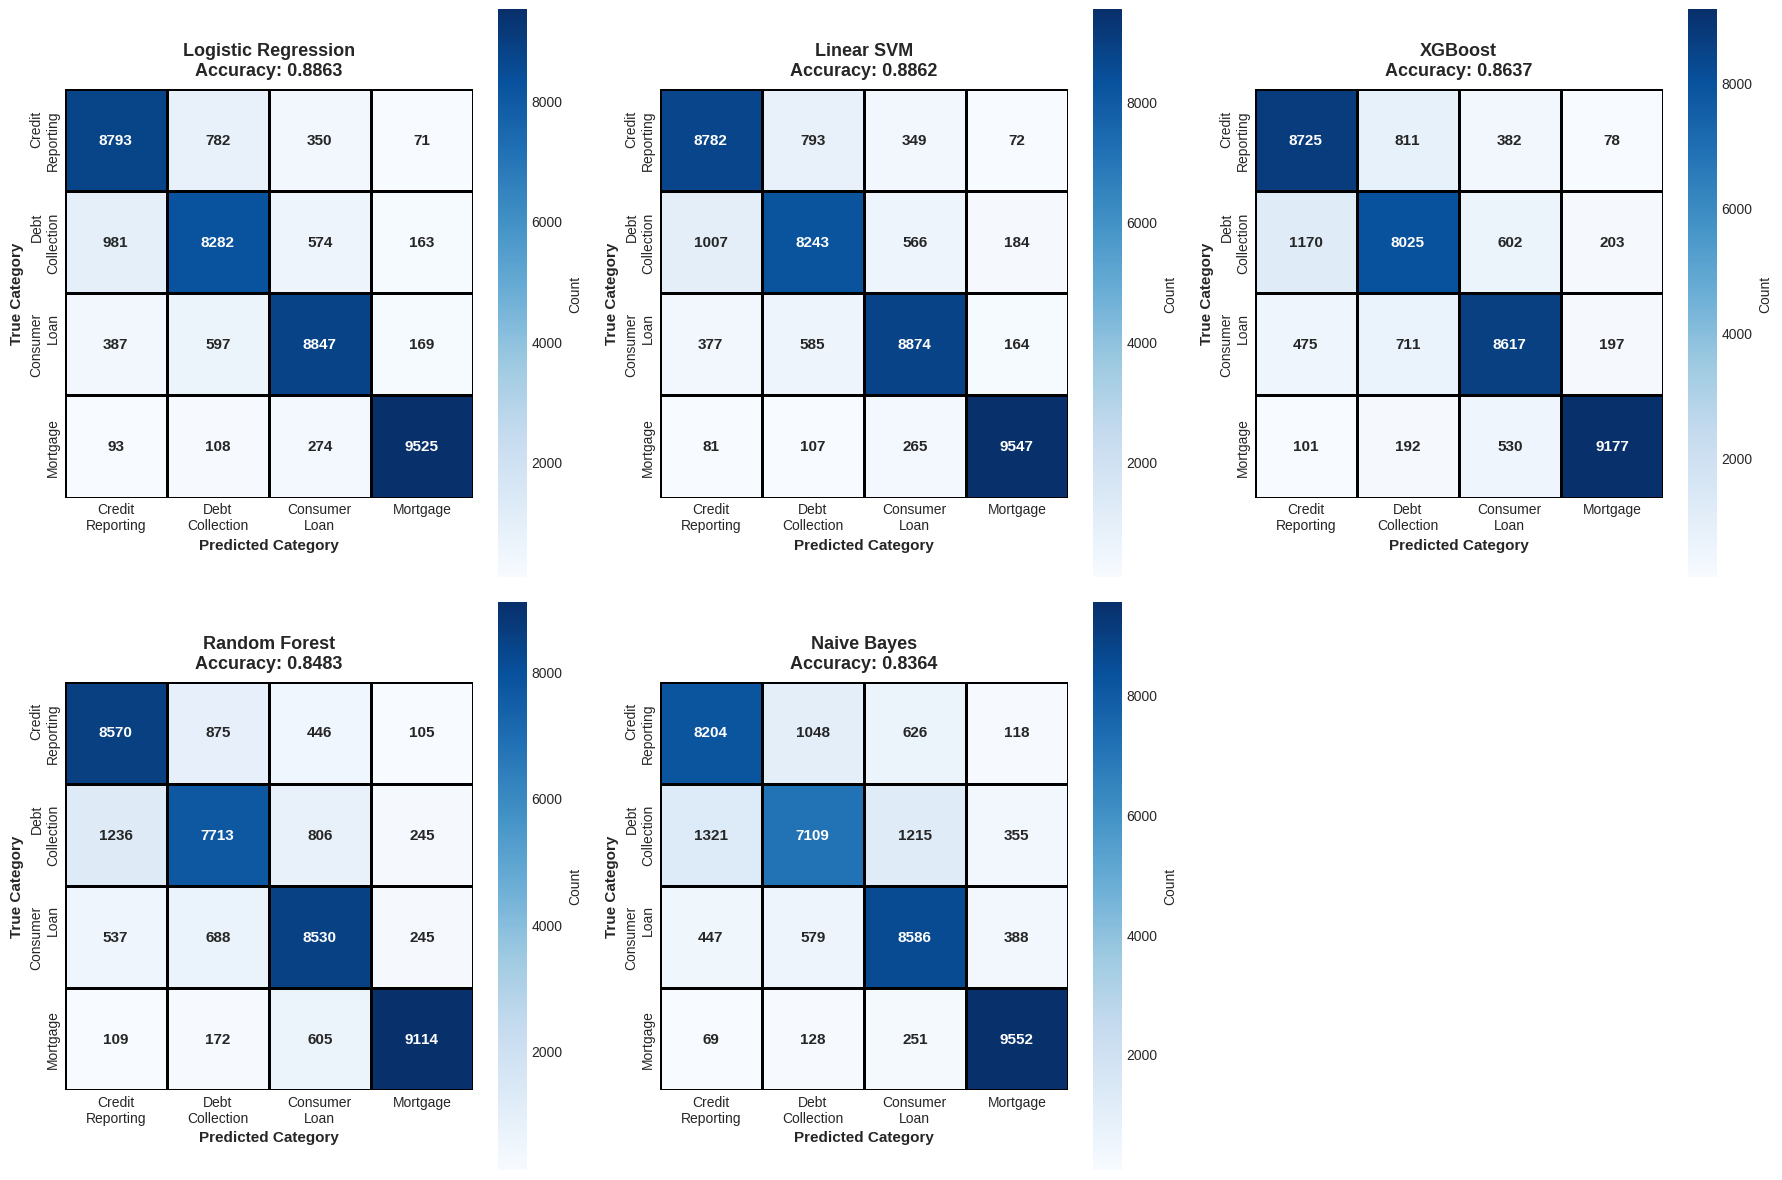


✓ Confusion matrices created!

Key insights from confusion matrices:
- Diagonal values show correct predictions
- Off-diagonal values show misclassifications
- Look for patterns in which categories get confused


In [23]:
# Confusion matrices show us which categories get confused with each other

print("="*70)
print("GENERATING CONFUSION MATRICES")
print("="*70)

# Create figure with confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

category_labels = ['Credit\nReporting', 'Debt\nCollection', 'Consumer\nLoan', 'Mortgage']

# Generate confusion matrix for each model
for idx, model_name in enumerate(comparison_df['Model']):
    ax = axes[idx]

    # Get predictions for this model
    y_pred = results[model_name]['predictions']

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=category_labels,
               yticklabels=category_labels,
               cbar_kws={'label': 'Count'},
               ax=ax, square=True, linewidths=1, linecolor='black',
               annot_kws={'fontsize': 11, 'fontweight': 'bold'})

    accuracy = results[model_name]['accuracy']
    ax.set_title(f'{model_name}\nAccuracy: {accuracy:.4f}',
                fontweight='bold', fontsize=13, pad=10)
    ax.set_ylabel('True Category', fontweight='bold', fontsize=11)
    ax.set_xlabel('Predicted Category', fontweight='bold', fontsize=11)

# Remove the extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("\n✓ Confusion matrices created!")
print("="*70)
print("\nKey insights from confusion matrices:")
print("- Diagonal values show correct predictions")
print("- Off-diagonal values show misclassifications")
print("- Look for patterns in which categories get confused")
print("="*70)

Analyzes misclassified complaints to understand which categories the model confuses and shows examples.

In [24]:
# Let's analyze which complaints were misclassified and why

print("="*70)
print("MISCLASSIFICATION ANALYSIS")
print("="*70)

# Find misclassified samples
misclassified_mask = (y_test != y_pred_best)
total_misclassified = misclassified_mask.sum()

print(f"\nTotal test samples: {len(y_test):,}")
print(f"Correctly classified: {(~misclassified_mask).sum():,}")
print(f"Misclassified: {total_misclassified:,}")
print(f"\nAccuracy: {((~misclassified_mask).sum() / len(y_test) * 100):.2f}%")
print(f"Error rate: {(total_misclassified / len(y_test) * 100):.2f}%")

# Analyze confusion pairs
print("\n" + "="*70)
print("MOST COMMON CONFUSION PAIRS")
print("="*70)
print("(True Category → Predicted Category)")
print("-"*70)

category_names_short = {
    0: 'Credit Reporting',
    1: 'Debt Collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

# Count confusion pairs
confusion_pairs = {}
for true_label, pred_label in zip(y_test[misclassified_mask], y_pred_best[misclassified_mask]):
    pair = (true_label, pred_label)
    confusion_pairs[pair] = confusion_pairs.get(pair, 0) + 1

# Sort by frequency
sorted_pairs = sorted(confusion_pairs.items(), key=lambda x: x[1], reverse=True)

for (true_cat, pred_cat), count in sorted_pairs[:10]:
    percentage = (count / total_misclassified) * 100
    print(f"{category_names_short[true_cat]:20} → {category_names_short[pred_cat]:20}: "
          f"{count:4} ({percentage:5.2f}% of errors)")

# Show examples of misclassifications
print("\n" + "="*70)
print("SAMPLE MISCLASSIFIED COMPLAINTS")
print("="*70)

# Get indices of misclassified samples
misclassified_indices = y_test[misclassified_mask].index

# Show 3 examples
for i, idx in enumerate(list(misclassified_indices)[:3], 1):
    # Get original row from dataframe
    original_row = df[df.index.isin([idx])]
    if len(original_row) > 0:
        true_cat = y_test.loc[idx]
        pred_cat = y_pred_best[list(y_test.index).index(idx)]

        print(f"\nExample {i}:")
        print("-"*70)
        print(f"True Category: {category_names_short[true_cat]}")
        print(f"Predicted: {category_names_short[pred_cat]}")

        complaint_text = df.loc[idx, 'Consumer complaint narrative']
        print(f"\nComplaint text (first 250 characters):")
        print(complaint_text[:250] + "...")

print("\n" + "="*70)
print("✓ Misclassification analysis completed!")
print("="*70)

MISCLASSIFICATION ANALYSIS

Total test samples: 39,996
Correctly classified: 35,447
Misclassified: 4,549

Accuracy: 88.63%
Error rate: 11.37%

MOST COMMON CONFUSION PAIRS
(True Category → Predicted Category)
----------------------------------------------------------------------
Debt Collection      → Credit Reporting    :  981 (21.57% of errors)
Credit Reporting     → Debt Collection     :  782 (17.19% of errors)
Consumer Loan        → Debt Collection     :  597 (13.12% of errors)
Debt Collection      → Consumer Loan       :  574 (12.62% of errors)
Consumer Loan        → Credit Reporting    :  387 ( 8.51% of errors)
Credit Reporting     → Consumer Loan       :  350 ( 7.69% of errors)
Mortgage             → Consumer Loan       :  274 ( 6.02% of errors)
Consumer Loan        → Mortgage            :  169 ( 3.72% of errors)
Debt Collection      → Mortgage            :  163 ( 3.58% of errors)
Mortgage             → Debt Collection     :  108 ( 2.37% of errors)

SAMPLE MISCLASSIFIED COMPLAINT

Identifies and visualizes the top 20 most important words that help classify each complaint category.

FEATURE IMPORTANCE ANALYSIS

Analyzing which words are most predictive for each category...
----------------------------------------------------------------------


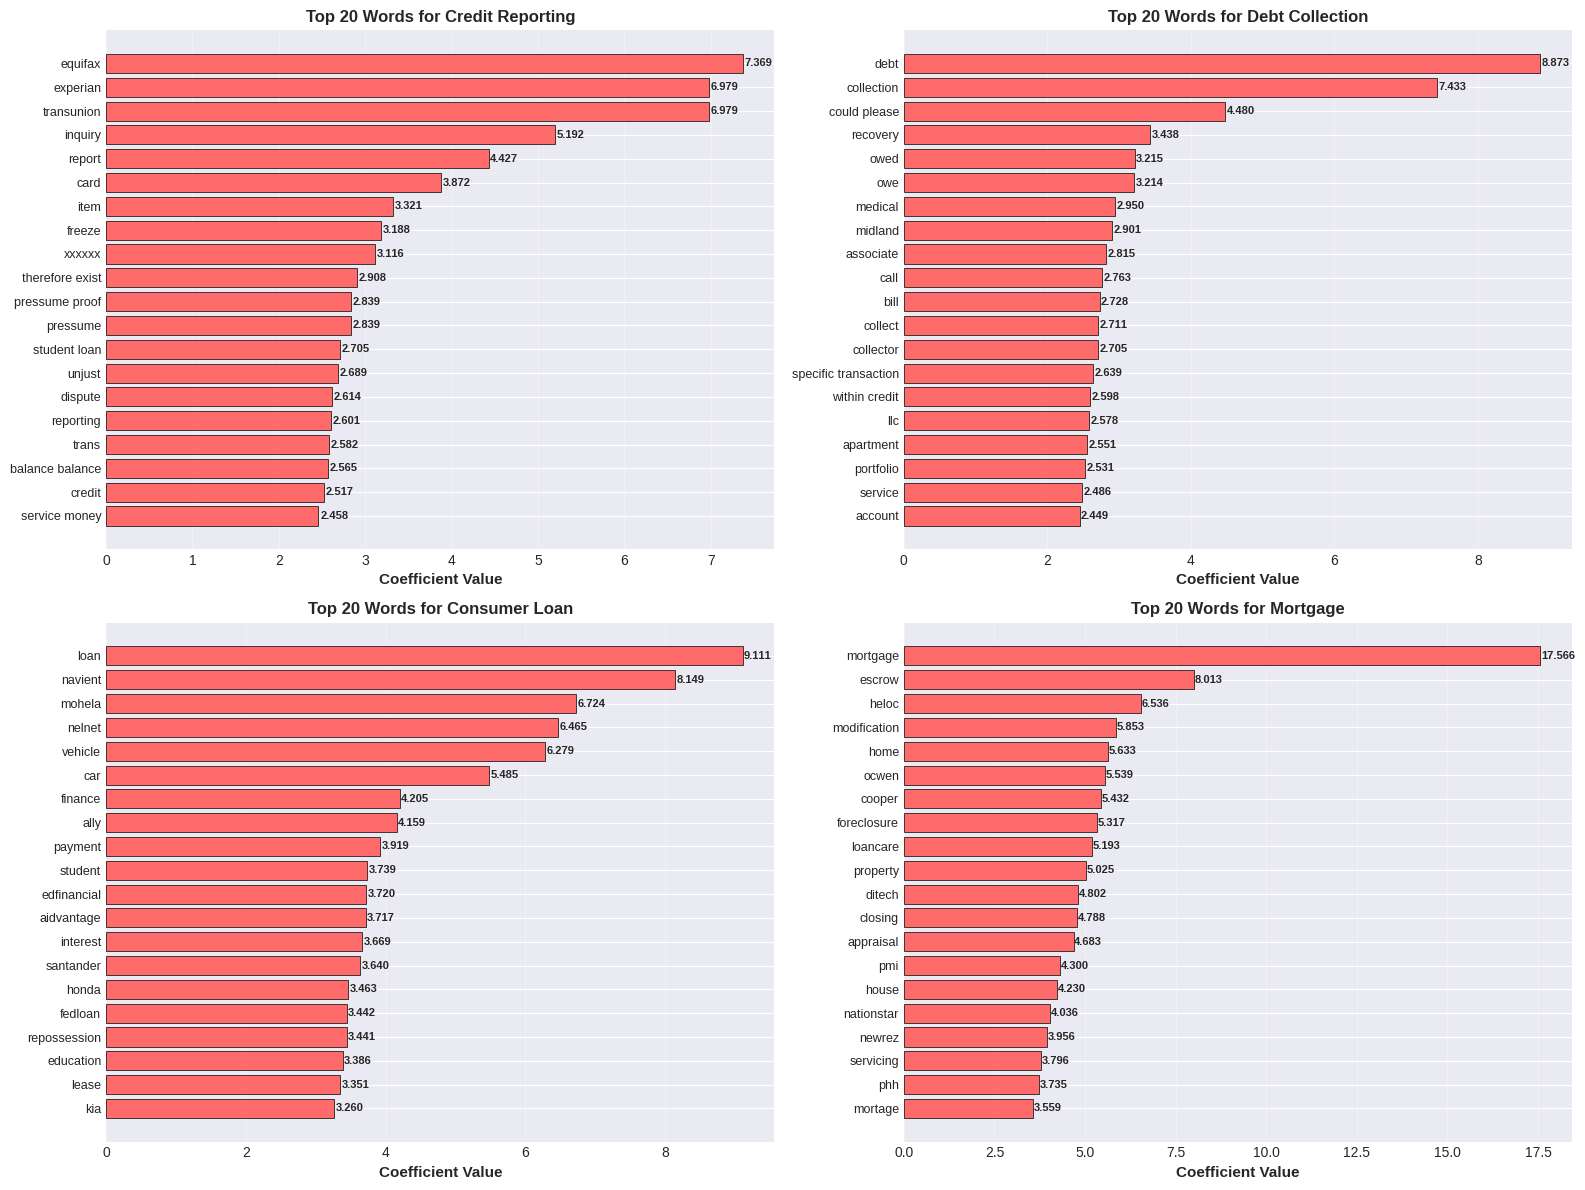


TOP 10 MOST IMPORTANT WORDS PER CATEGORY

Credit Reporting:
----------------------------------------------------------------------
 1. equifax
 2. experian
 3. transunion
 4. inquiry
 5. report
 6. card
 7. item
 8. freeze
 9. xxxxxx
10. therefore exist

Debt Collection:
----------------------------------------------------------------------
 1. debt
 2. collection
 3. could please
 4. recovery
 5. owed
 6. owe
 7. medical
 8. midland
 9. associate
10. call

Consumer Loan:
----------------------------------------------------------------------
 1. loan
 2. navient
 3. mohela
 4. nelnet
 5. vehicle
 6. car
 7. finance
 8. ally
 9. payment
10. student

Mortgage:
----------------------------------------------------------------------
 1. mortgage
 2. escrow
 3. heloc
 4. modification
 5. home
 6. ocwen
 7. cooper
 8. foreclosure
 9. loancare
10. property

✓ Feature importance analysis completed!


In [25]:
# Let's see which words are most important for classifying each category

print("="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

print("\nAnalyzing which words are most predictive for each category...")
print("-"*70)

# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients from Logistic Regression
# Each row represents a category, each column represents a feature
coefficients = best_model.coef_

category_names = ['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage']

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# For each category
for idx, (category, coef_values) in enumerate(zip(category_names, coefficients)):
    ax = axes[idx]

    # Get top 20 features with highest positive coefficients
    top_20_indices = np.argsort(coef_values)[-20:][::-1]
    top_20_features = feature_names[top_20_indices]
    top_20_coefs = coef_values[top_20_indices]

    # Create horizontal bar plot
    y_pos = np.arange(len(top_20_features))
    colors = ['#FF6B6B' if c > 0 else '#4ECDC4' for c in top_20_coefs]

    bars = ax.barh(y_pos, top_20_coefs, color=colors, edgecolor='black', linewidth=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_20_features, fontsize=9)
    ax.set_xlabel('Coefficient Value', fontweight='bold', fontsize=11)
    ax.set_title(f'Top 20 Words for {category}', fontweight='bold', fontsize=12)
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

    # Add coefficient values
    for i, (feature, coef_val) in enumerate(zip(top_20_features, top_20_coefs)):
        ax.text(coef_val + 0.02, i, f'{coef_val:.3f}',
               va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Print top 10 features for each category
print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT WORDS PER CATEGORY")
print("="*70)

for idx, (category, coef_values) in enumerate(zip(category_names, coefficients)):
    print(f"\n{category}:")
    print("-"*70)

    top_10_indices = np.argsort(coef_values)[-10:][::-1]
    top_10_features = feature_names[top_10_indices]

    for i, feature in enumerate(top_10_features, 1):
        print(f"{i:2}. {feature}")

print("\n" + "="*70)
print("✓ Feature importance analysis completed!")
print("="*70)

Creates a prediction function that can classify any new complaint text and tests it on 4 examples.

In [26]:
# Now let's create a function to classify new complaints

print("="*70)
print("CREATING PREDICTION FUNCTION")
print("="*70)

def predict_complaint_category(complaint_text):
    """
    Predict the category of a new complaint

    Parameters:
    -----------
    complaint_text : str
        The text of the consumer complaint

    Returns:
    --------
    dict : Contains predicted category, confidence, and all probabilities
    """

    # Step 1: Clean the text
    cleaned = clean_text(complaint_text)

    # Step 2: Convert to TF-IDF features
    text_tfidf = tfidf_vectorizer.transform([cleaned])

    # Step 3: Make prediction
    prediction = best_model.predict(text_tfidf)[0]

    # Step 4: Get confidence scores
    probabilities = best_model.predict_proba(text_tfidf)[0]

    # Map categories to names
    category_map = {
        0: 'Credit Reporting/Repair',
        1: 'Debt Collection',
        2: 'Consumer Loan',
        3: 'Mortgage'
    }

    # Create result dictionary
    result = {
        'predicted_category': category_map[prediction],
        'category_code': int(prediction),
        'confidence': float(probabilities[prediction]),
        'all_probabilities': {
            category_map[i]: float(prob)
            for i, prob in enumerate(probabilities)
        }
    }

    return result

print("\n✓ Prediction function created successfully!")
print("="*70)

# Test with example complaints
print("\nTESTING PREDICTION FUNCTION")
print("="*70)

# Create 4 test complaints (one for each category)
test_complaints = [
    "I found incorrect information on my credit report. There are accounts that don't belong to me and it's hurting my credit score. I need these fraudulent accounts removed.",

    "A debt collector keeps calling me about a debt I don't owe. They call multiple times a day and won't stop even though I told them this isn't my debt.",

    "I took out a student loan and the interest rate is too high. I'm having trouble making the monthly payments and need help with restructuring.",

    "I'm three months behind on my mortgage payments and the bank is threatening foreclosure. I need help getting a loan modification."
]

# Test each complaint
for i, complaint in enumerate(test_complaints, 1):
    print(f"\n{'='*70}")
    print(f"TEST EXAMPLE {i}")
    print('='*70)
    print(f"Complaint: {complaint[:150]}...")

    result = predict_complaint_category(complaint)

    print(f"\n✓ Predicted Category: {result['predicted_category']}")
    print(f"✓ Category Code: {result['category_code']}")
    print(f"✓ Confidence: {result['confidence']*100:.2f}%")

    print(f"\nAll Category Probabilities:")
    for category, probability in sorted(result['all_probabilities'].items(),
                                       key=lambda x: x[1], reverse=True):
        bar = '█' * int(probability * 50)
        print(f"  {category:25}: {bar} {probability*100:5.2f}%")

print("\n" + "="*70)
print("✓ All tests completed successfully!")
print("="*70)

CREATING PREDICTION FUNCTION

✓ Prediction function created successfully!

TESTING PREDICTION FUNCTION

TEST EXAMPLE 1
Complaint: I found incorrect information on my credit report. There are accounts that don't belong to me and it's hurting my credit score. I need these fraudulen...

✓ Predicted Category: Credit Reporting/Repair
✓ Category Code: 0
✓ Confidence: 95.05%

All Category Probabilities:
  Credit Reporting/Repair  : ███████████████████████████████████████████████ 95.05%
  Debt Collection          : █  4.00%
  Consumer Loan            :   0.85%
  Mortgage                 :   0.10%

TEST EXAMPLE 2
Complaint: A debt collector keeps calling me about a debt I don't owe. They call multiple times a day and won't stop even though I told them this isn't my debt....

✓ Predicted Category: Debt Collection
✓ Category Code: 1
✓ Confidence: 99.70%

All Category Probabilities:
  Debt Collection          : █████████████████████████████████████████████████ 99.70%
  Consumer Loan            :  